In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import CococoNet_reader
from scipy import sparse
from statistics import mean
import pymn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(401)

In [3]:
co_expressalog_map_85 = pd.read_csv('/data/passala/Generated_Tables/Maize_Rice_integration/true_pair_dataframe_default_settigns.csv')
co_expressalog_map_85

,Rice Gene,Maize Gene
0,Os01g0195400,Zm00001d008850
1,Os05g0199100,Zm00001d037751
2,Os01g0101600,Zm00001d008390
3,Os01g0256800,Zm00001d008326
4,Os01g0847100,Zm00001d042875
...,...,...
7652,BAC19863,GRMZM5G898647
7653,BAC19893,GRMZM5G867512
7654,BAC19869,GRMZM5G861791
7655,BAC19875,GRMZM5G804358


In [4]:
co_expressalog_map_85 = co_expressalog_map_85.drop_duplicates(subset = 'Rice Gene')
co_expressalog_map_85 = co_expressalog_map_85.drop_duplicates(subset = 'Maize Gene')
co_expressalog_map_85

,Rice Gene,Maize Gene
0,Os01g0195400,Zm00001d008850
1,Os05g0199100,Zm00001d037751
2,Os01g0101600,Zm00001d008390
3,Os01g0256800,Zm00001d008326
4,Os01g0847100,Zm00001d042875
...,...,...
7652,BAC19863,GRMZM5G898647
7653,BAC19893,GRMZM5G867512
7654,BAC19869,GRMZM5G861791
7655,BAC19875,GRMZM5G804358


In [5]:
maize_cccnt = CococoNet_reader.read_cococonet('maize')


In [6]:
rice_sc_data = sc.read_10x_mtx('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Rice_japonica/Cell_ranger_results/Rice_paper/outs/filtered_feature_bc_matrix',cache=True)

In [7]:
maize_Data = sc.read_10x_mtx('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Maize_nitrate_root_SC/Cell_ranger_output_folder/Full_output/cells_with_nitrate/outs/filtered_feature_bc_matrix', cache = True)

In [8]:
rice_sc_data.var

,gene_ids,feature_types
Os01g0100100,Os01g0100100,Gene Expression
Os01g0100200,Os01g0100200,Gene Expression
Os01g0100300,Os01g0100300,Gene Expression
Os01g0100400,Os01g0100400,Gene Expression
Os01g0100466,Os01g0100466,Gene Expression
...,...,...
Os12g0641200,Os12g0641200,Gene Expression
Os12g0641300,Os12g0641300,Gene Expression
Os12g0641400,Os12g0641400,Gene Expression
Os12g0641500,Os12g0641500,Gene Expression


In [9]:
maize_Data.var['In CoCoCoNet'] = 0
maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1
#maize_Data = maize_Data[:,maize_Data.var['In CoCoCoNet'] == 1]
maize_Data

/tmp/ipykernel_886111/898070478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1


AnnData object with n_obs × n_vars = 4101 × 46430
    var: 'gene_ids', 'feature_types', 'In CoCoCoNet'

In [10]:
sc.pp.filter_cells(maize_Data, min_genes=200)
sc.pp.filter_genes(maize_Data, min_cells=2)

In [11]:
maize_Data

AnnData object with n_obs × n_vars = 4100 × 25653
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'In CoCoCoNet', 'n_cells'

In [12]:
sc.pp.normalize_total(maize_Data, target_sum=1e4)
sc.pp.log1p(maize_Data)


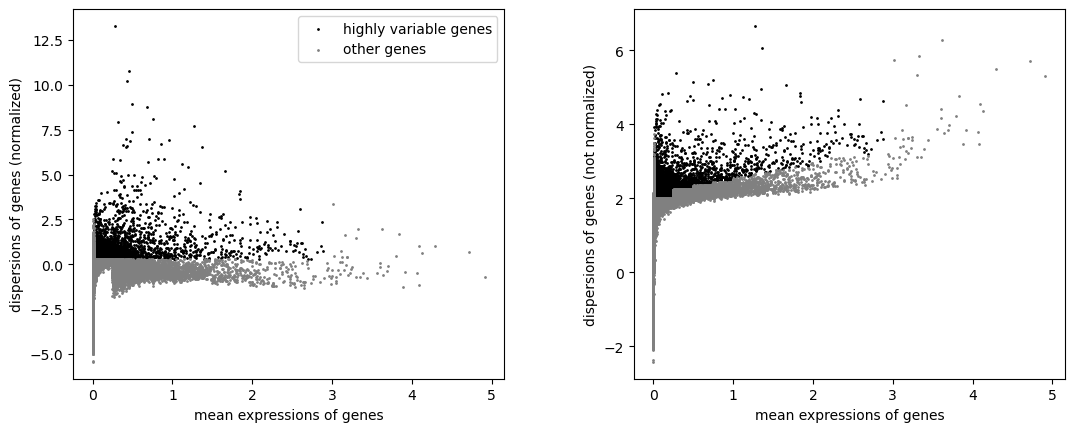

In [13]:

sc.pp.highly_variable_genes(maize_Data, min_mean=0.0125, max_mean=3, min_disp=0.3) # disp .5
sc.pl.highly_variable_genes(maize_Data)

2022-10-17 17:48:53.666180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 17:48:54.129874: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-17 17:48:54.134681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 17:48:54.134693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

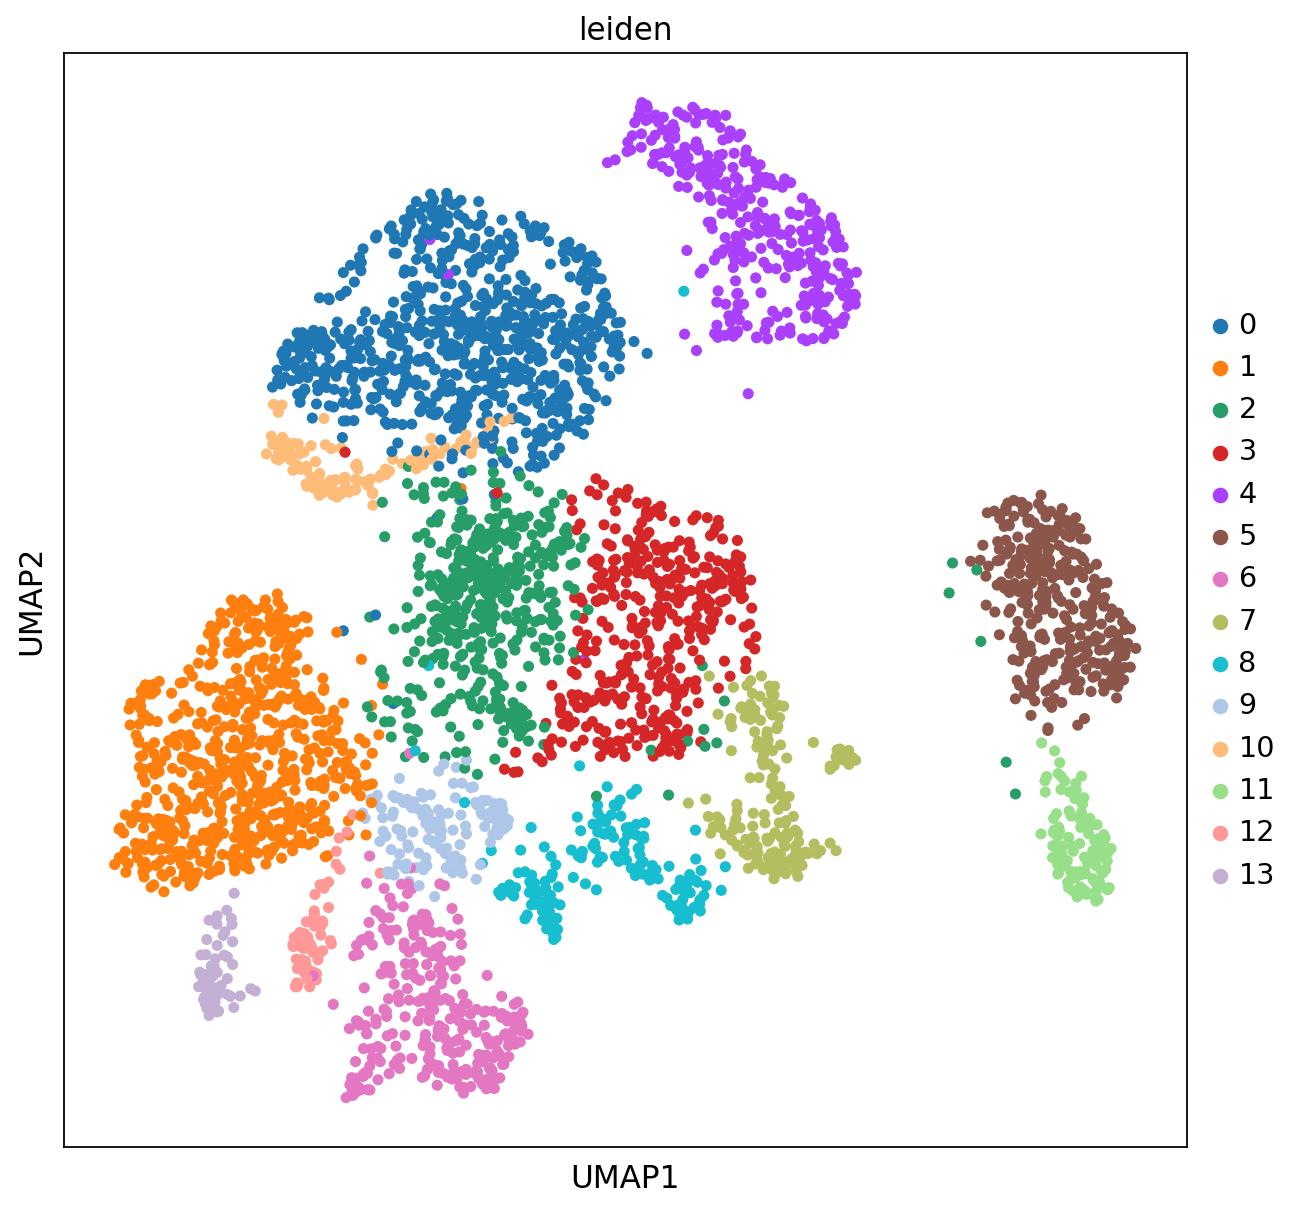

In [14]:
sc.set_figure_params(facecolor = 'white', figsize = (9,9))
sc.tl.pca(maize_Data, svd_solver='arpack', random_state= 200)
sc.pp.neighbors(maize_Data, n_neighbors=30, n_pcs=50, random_state= 500)
sc.tl.umap(maize_Data, random_state= 221)
sc.tl.leiden(maize_Data, random_state= 1000, resolution= .6)

sc.pl.umap(maize_Data, color = 'leiden', s=100)

In [15]:
maize_Data.var

,gene_ids,feature_types,In CoCoCoNet,n_cells,highly_variable,means,dispersions,dispersions_norm
Zm00001d027230,Zm00001d027230,Gene Expression,0,67,False,0.024387,1.696221,-0.095275
Zm00001d027231,Zm00001d027231,Gene Expression,1,290,True,0.241811,2.104409,0.435565
Zm00001d027233,Zm00001d027233,Gene Expression,1,2,False,0.000593,0.203313,-2.036773
Zm00001d027236,Zm00001d027236,Gene Expression,1,36,True,0.021745,2.032777,0.342410
Zm00001d027239,Zm00001d027239,Gene Expression,1,60,False,0.023626,1.419417,-0.455253
...,...,...,...,...,...,...,...,...
SSU_rRNA_eukarya-106,ENSRNA049478534,Gene Expression,1,67,True,0.090445,2.502171,0.952848
5_8S_rRNA-57,ENSRNA049478548,Gene Expression,0,8,False,0.010975,2.160190,0.508108
SSU_rRNA_eukarya-107,ENSRNA049478530,Gene Expression,1,217,True,0.307557,2.541439,1.507421
OVATE-transcription factor 3,Zm00001d000458,Gene Expression,0,2,False,0.000167,-0.994376,-3.594344


In [16]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d024960'], s=80, legend_loc = 'on data')# Epidermis

In [17]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d038325'], s=80, legend_loc = 'on data')# Epidermis

In [18]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d040257'], s=80, legend_loc = 'on data')# stele

In [19]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d018029'], s=80, legend_loc = 'on data')# endodermis

In [20]:
maize_Data.obs['Cell Cluster Annotation'] = 'Not Annotated'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '5'] = 'Epidermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['0','2','3','10'])] = 'Cortex'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['1'])] = 'Stele'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['4'])] = 'Exodermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['6'])] = 'CC'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['7'])] = 'Meristem'

maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['9'])] = 'Pericycle'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['11'])] = 'Root Hair'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['12'])] = 'Endodermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['13'])] = 'Protophloem'




/tmp/ipykernel_886111/1510908982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '5'] = 'Epidermis'
/tmp/ipykernel_886111/1510908982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['0','2','3','10'])] = 'Cortex'
/tmp/ipykernel_886111/1510908982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [21]:
rice_sc_data.var_names_make_unique()

In [22]:
rice_sc_data.var_names

Index(['Os01g0100100', 'Os01g0100200', 'Os01g0100300', 'Os01g0100400',
       'Os01g0100466', 'Os01g0100500', 'Os01g0100600', 'Os01g0100650',
       'Os01g0100700', 'Os01g0100800',
       ...
       'Os12g0640800', 'Os12g0640900', 'Os12g0640951', 'Os12g0640950',
       'Os12g0641100', 'Os12g0641200', 'Os12g0641300', 'Os12g0641400',
       'Os12g0641500', 'Os12g0641600'],
      dtype='object', length=37863)

In [23]:
sc.pp.normalize_total(rice_sc_data, target_sum=1e4)

sc.pp.log1p(rice_sc_data)

In [24]:
sc.pp.highly_variable_genes(rice_sc_data, min_mean=0.0125, max_mean=3, min_disp=.2)
#dispersion .5

In [25]:
sc.set_figure_params(facecolor = 'white', figsize = (9,9)) # Make figures bigger and on a white background because your PI is 70 and doesn't know what a .png is


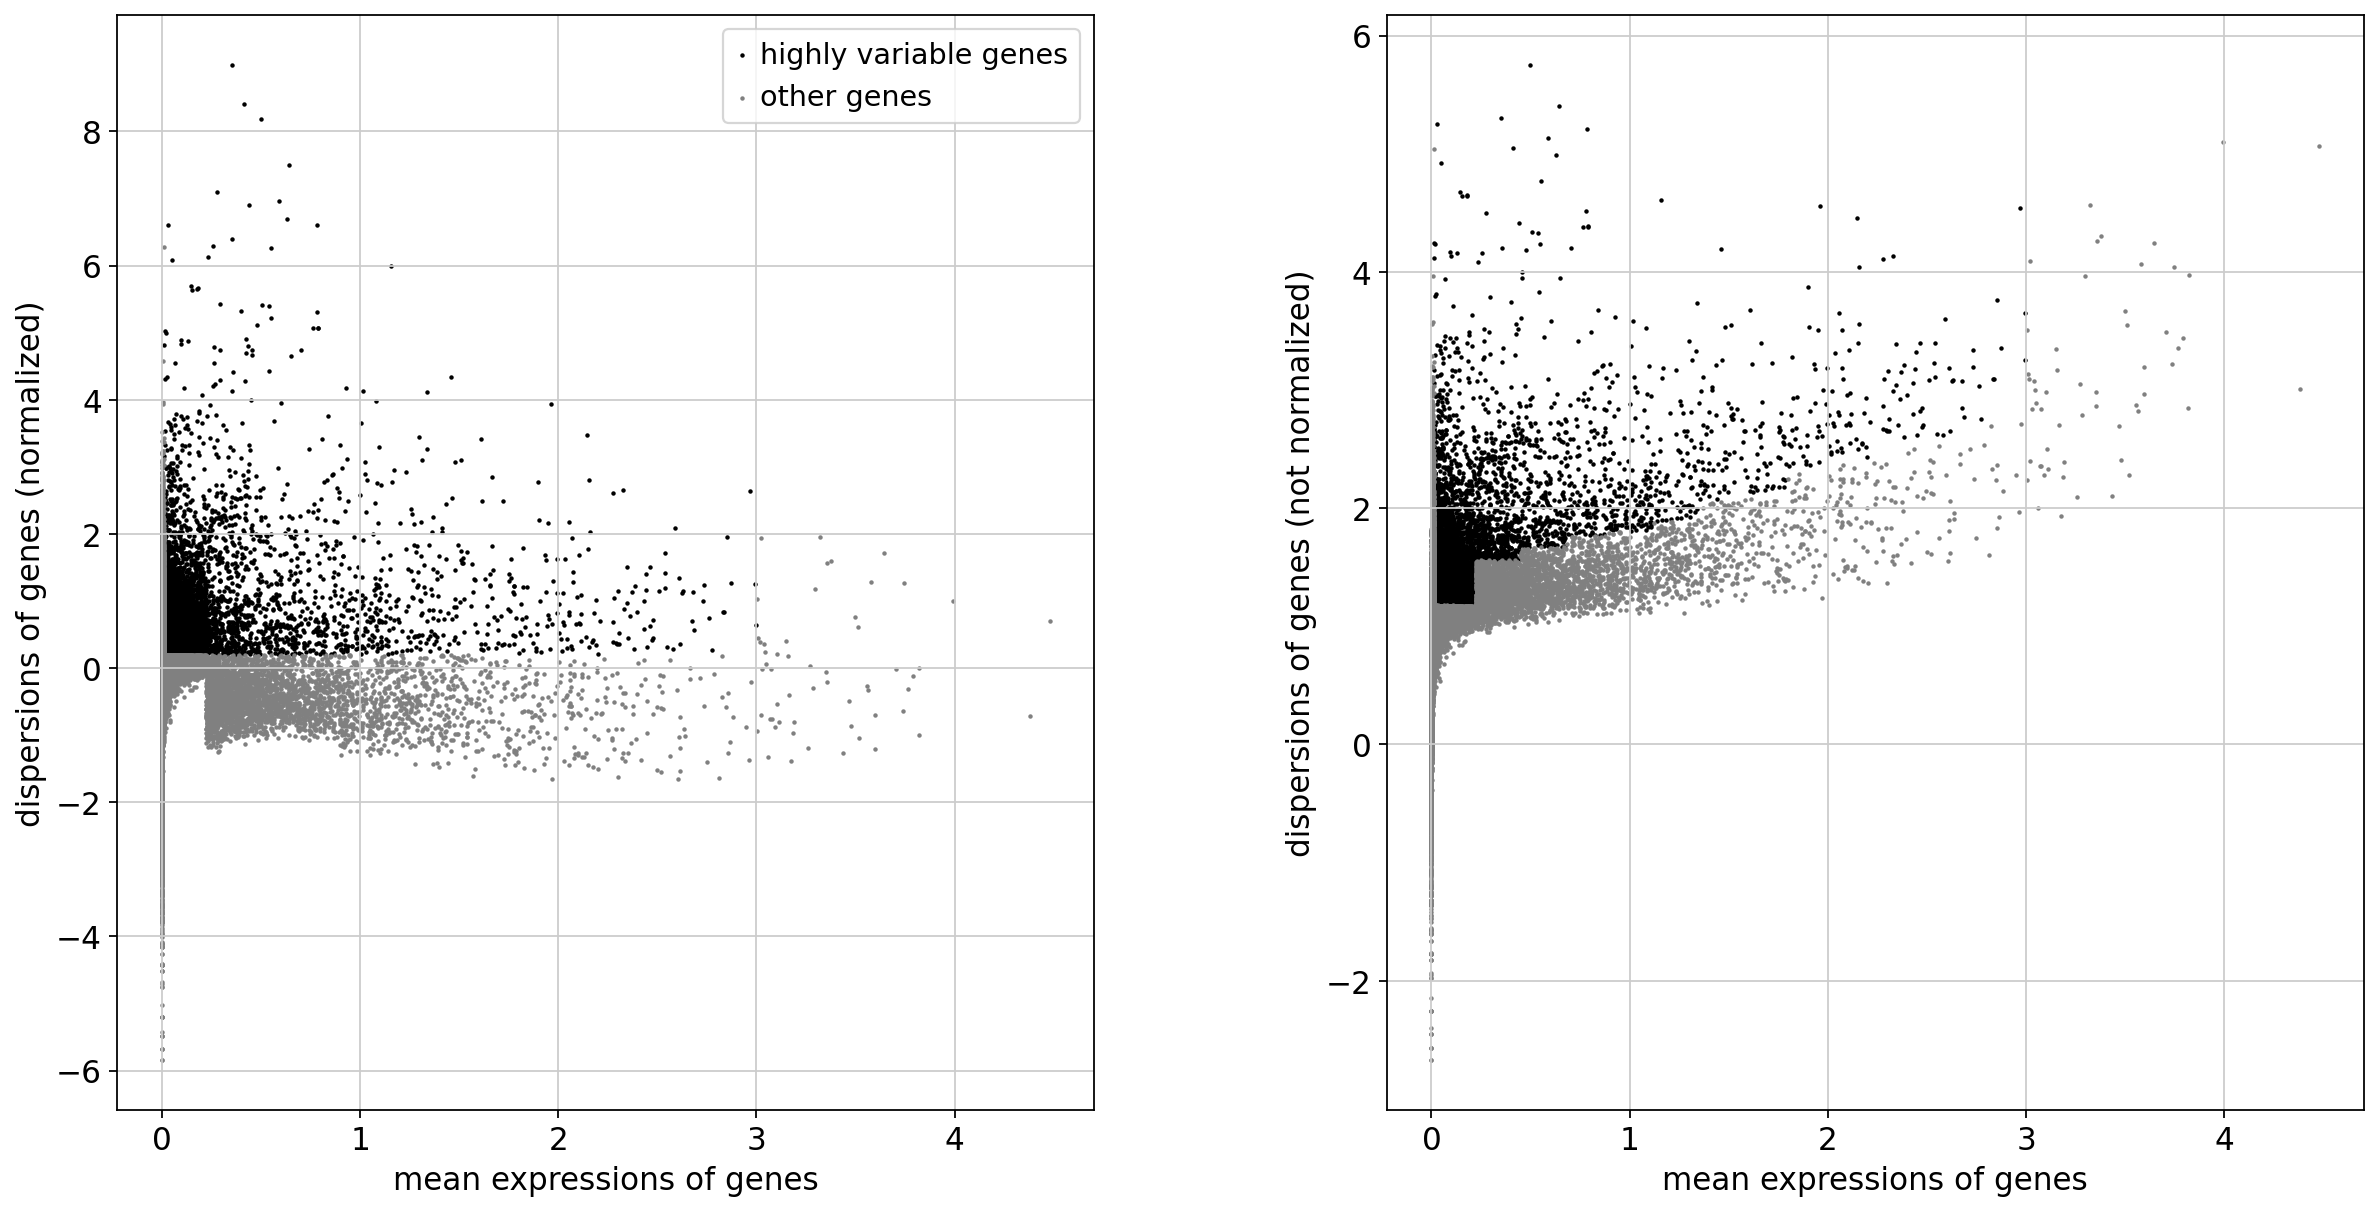

In [26]:
sc.pl.highly_variable_genes(rice_sc_data)


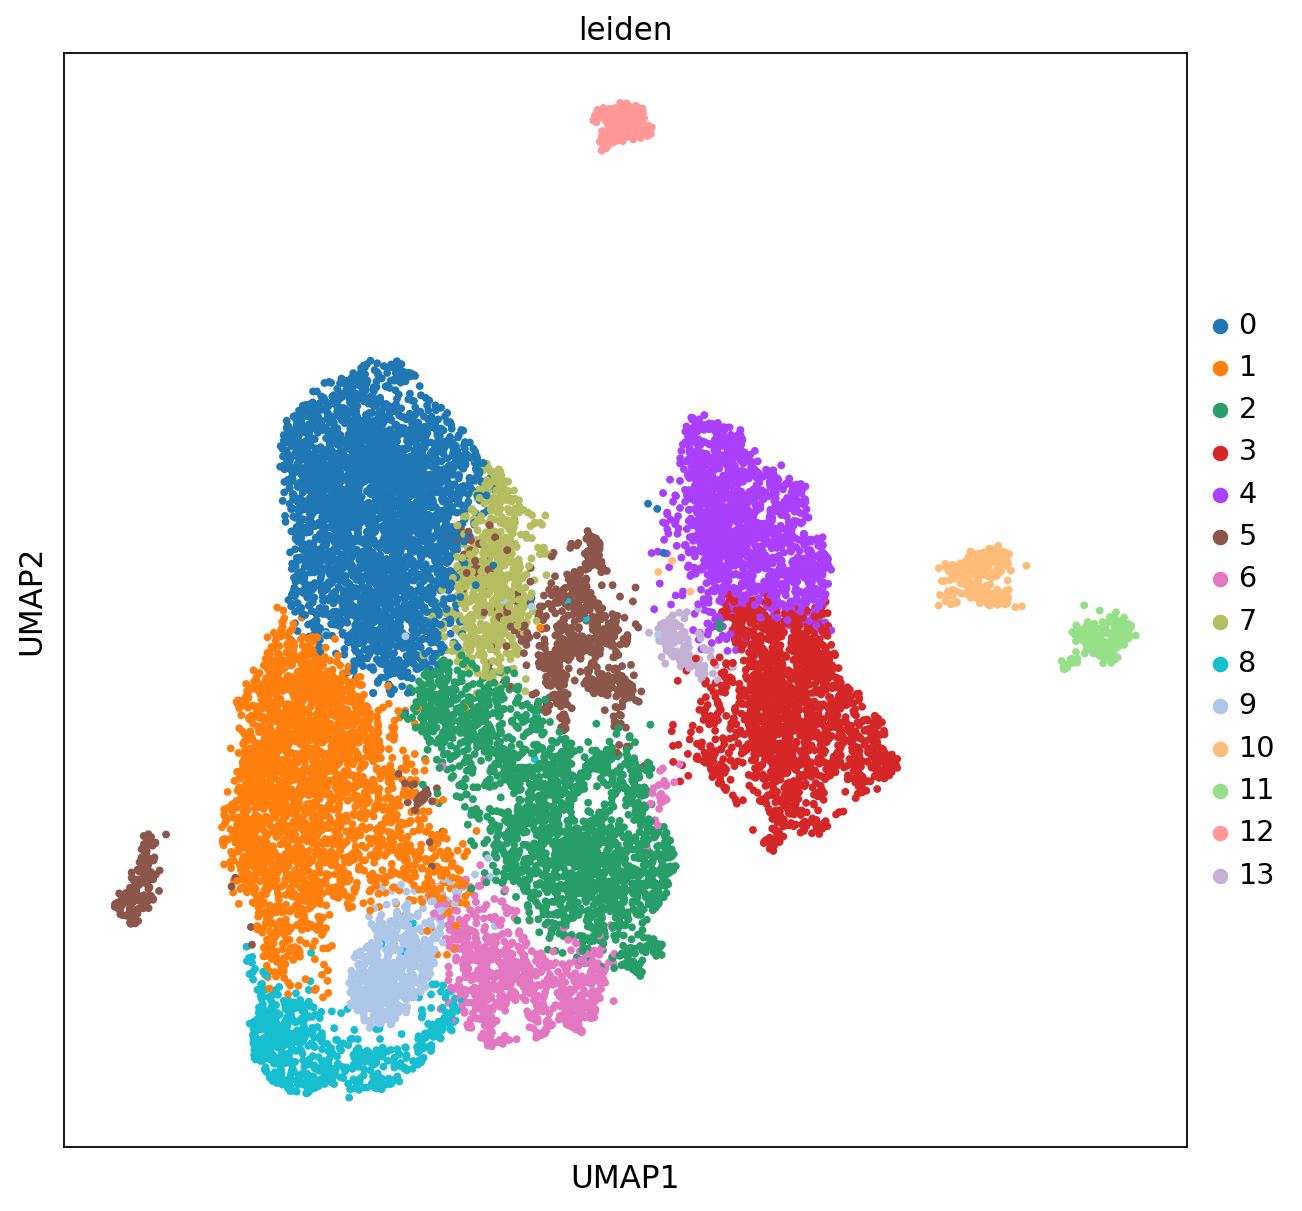

In [27]:
sc.tl.pca(rice_sc_data, svd_solver='arpack', random_state= 3456)
sc.pp.neighbors(rice_sc_data, n_neighbors=30, n_pcs=50, random_state= 112) ##30,50 # 25,45
sc.tl.umap(rice_sc_data, random_state= 649)
sc.tl.leiden(rice_sc_data, random_state= 823, resolution= .5)

sc.pl.umap(rice_sc_data, color = 'leiden', s=50,)

In [28]:
marker_genes = pd.read_csv('/home/passala/git/Coexpressalog_Method_Development/rice_maize_data/marker_genes.csv', sep= '\t')
#marker_genes['Gene ID'] =marker_genes['Gene ID'].str.split('-').str[1]
#marker_genes['Gene ID'] =marker_genes['Gene ID'].str[:5]+'0'+marker_genes['Gene ID'].str[5:]+'0'
marker_genes

,Gene ID,P value,avg_log(Foldchange),pct.1 (enriched cluster),pct.2 (other clusters),adjusted P value,cluster
0,LOC-Os02g44310,0.000000e+00,1.648360,0.999,0.977,0.000000e+00,cortex
1,LOC-Os06g13680,0.000000e+00,0.630611,0.999,0.998,0.000000e+00,cortex
2,LOC-Os07g34589,0.000000e+00,0.597807,0.999,0.993,0.000000e+00,cortex
3,LOC-Os01g21120,0.000000e+00,0.462817,0.999,0.991,0.000000e+00,cortex
4,LOC-Os04g33110,0.000000e+00,0.756632,0.996,0.985,0.000000e+00,cortex
...,...,...,...,...,...,...,...
6536,LOC-Os05g19600,4.260000e-23,0.312931,0.176,0.102,1.670000e-18,stele
6537,LOC-Os03g26460,1.500000e-21,0.271316,0.433,0.344,5.890000e-17,stele
6538,LOC-Os06g35560,4.780000e-20,0.255126,0.600,0.498,1.870000e-15,stele
6539,LOC-Os01g52010,1.400000e-14,0.294384,0.302,0.243,5.500000e-10,stele


In [29]:
gene_convertor_for_rice = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Rice_japonica/genome_conversion/cleaned_conversion_with_duplicates.csv')


In [30]:
merged_marker_genes = marker_genes.merge(how = 'left', right= gene_convertor_for_rice, left_on= 'Gene ID', right_on= 'MSU Format',)
merged_marker_genes

,Gene ID,P value,avg_log(Foldchange),pct.1 (enriched cluster),pct.2 (other clusters),adjusted P value,cluster,RAP Format,MSU Format
0,LOC-Os02g44310,0.000000e+00,1.648360,0.999,0.977,0.000000e+00,cortex,Os02g0662000,LOC-Os02g44310
1,LOC-Os06g13680,0.000000e+00,0.630611,0.999,0.998,0.000000e+00,cortex,Os06g0246000,LOC-Os06g13680
2,LOC-Os07g34589,0.000000e+00,0.597807,0.999,0.993,0.000000e+00,cortex,Os07g0529800,LOC-Os07g34589
3,LOC-Os01g21120,0.000000e+00,0.462817,0.999,0.991,0.000000e+00,cortex,Os01g0313300,LOC-Os01g21120
4,LOC-Os04g33110,0.000000e+00,0.756632,0.996,0.985,0.000000e+00,cortex,Os04g0403900,LOC-Os04g33110
...,...,...,...,...,...,...,...,...,...
6612,LOC-Os05g19600,4.260000e-23,0.312931,0.176,0.102,1.670000e-18,stele,Os05g0277000,LOC-Os05g19600
6613,LOC-Os03g26460,1.500000e-21,0.271316,0.433,0.344,5.890000e-17,stele,Os03g0381300,LOC-Os03g26460
6614,LOC-Os06g35560,4.780000e-20,0.255126,0.600,0.498,1.870000e-15,stele,Os06g0548200,LOC-Os06g35560
6615,LOC-Os01g52010,1.400000e-14,0.294384,0.302,0.243,5.500000e-10,stele,Os01g0717700,LOC-Os01g52010


In [31]:
rice_sc_data.var_names_make_unique()

In [32]:
rice_sc_data.var

,gene_ids,feature_types,highly_variable,means,dispersions,dispersions_norm
Os01g0100100,Os01g0100100,Gene Expression,False,9.381453e-03,1.401757,0.553760
Os01g0100200,Os01g0100200,Gene Expression,False,4.067292e-02,0.994555,-0.085596
Os01g0100300,Os01g0100300,Gene Expression,False,4.735694e-04,0.386184,-1.040810
Os01g0100400,Os01g0100400,Gene Expression,False,4.003630e-03,0.607636,-0.693104
Os01g0100466,Os01g0100466,Gene Expression,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...
Os12g0641200,Os12g0641200,Gene Expression,False,1.339002e-02,0.937923,-0.174516
Os12g0641300,Os12g0641300,Gene Expression,False,1.637106e-02,0.751851,-0.466670
Os12g0641400,Os12g0641400,Gene Expression,True,4.142963e-01,1.574961,0.228052
Os12g0641500,Os12g0641500,Gene Expression,True,6.777357e-02,1.372489,0.507805


In [33]:
rice_sc_data.obs['Cell Cluster Annotation'] = 'Not Annotated'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['1','11'])] = 'Stele'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['0','3',])] = 'Cortex'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['2','5','6'])] = 'Epidermis'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['9'])] = 'Root Hair'

types_to_include_in_mapping = ['Epidermis','Cortex','Stele', 'Root Hair']

/tmp/ipykernel_886111/2794517125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['1','11'])] = 'Stele'
/tmp/ipykernel_886111/2794517125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['0','3',])] = 'Cortex'
/tmp/ipykernel_886111/2794517125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [34]:
sec_rice = rice_sc_data[rice_sc_data.obs.loc[rice_sc_data.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]
sec_rice

View of AnnData object with n_obs × n_vars = 11769 × 37863
    obs: 'leiden', 'Cell Cluster Annotation'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


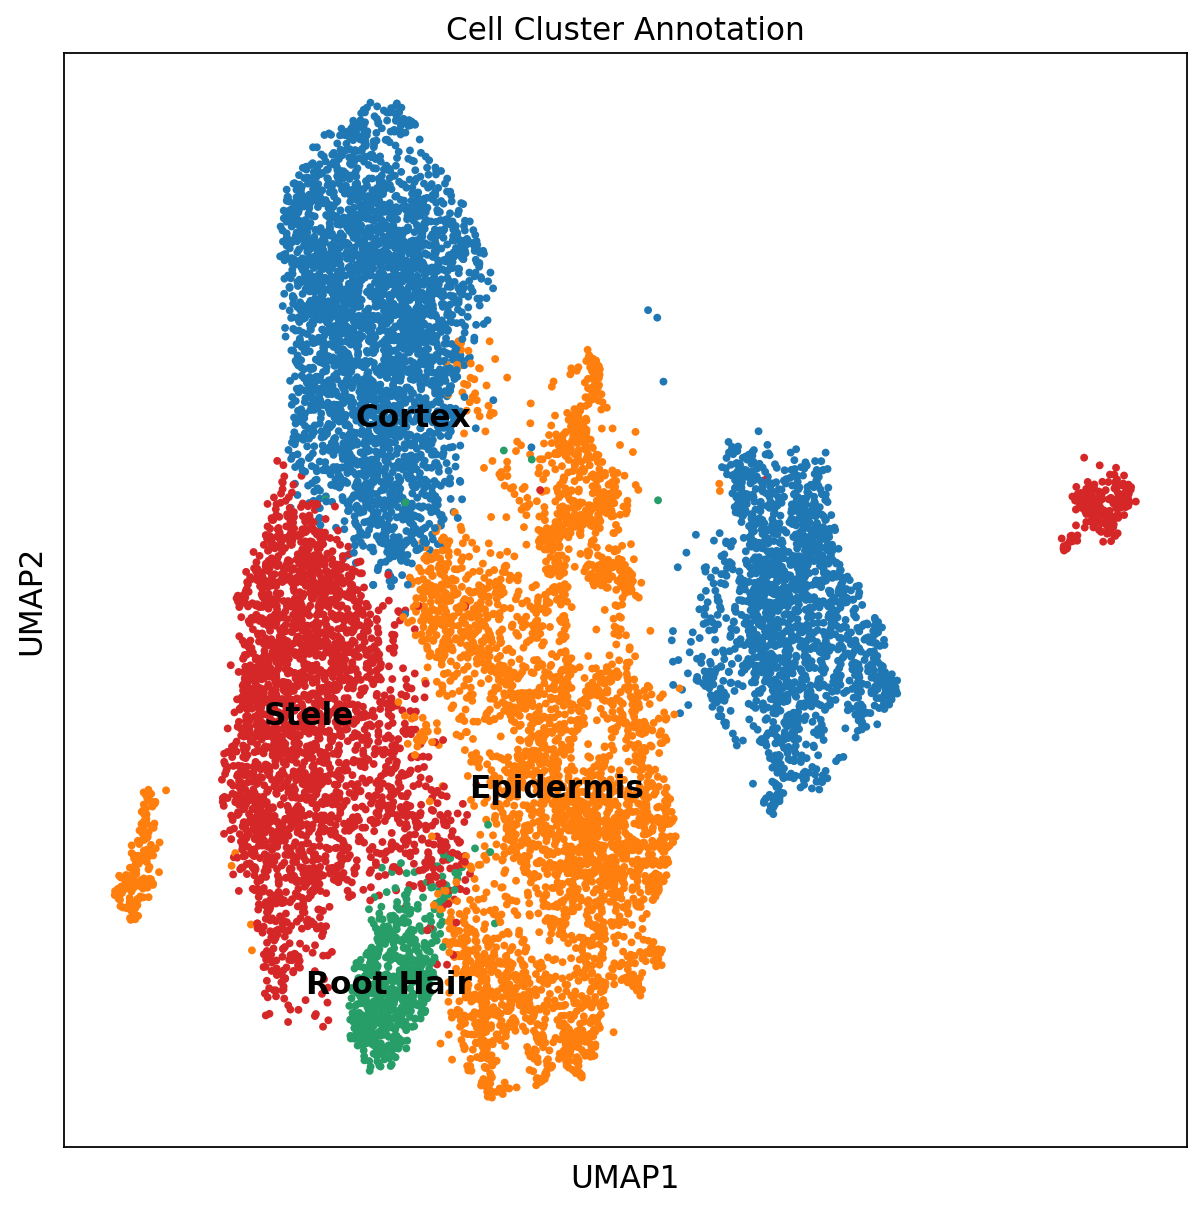

In [35]:
sc.pl.umap(sec_rice, color = ['Cell Cluster Annotation'], s=50, legend_loc = 'on data')

In [36]:
sec_maize = maize_Data[maize_Data.obs.loc[maize_Data.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]


In [37]:
sec_maize.obs.value_counts(subset = 'Cell Cluster Annotation')

Cell Cluster Annotation
Cortex       1719
Stele         677
Epidermis     329
Root Hair     107
dtype: int64

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


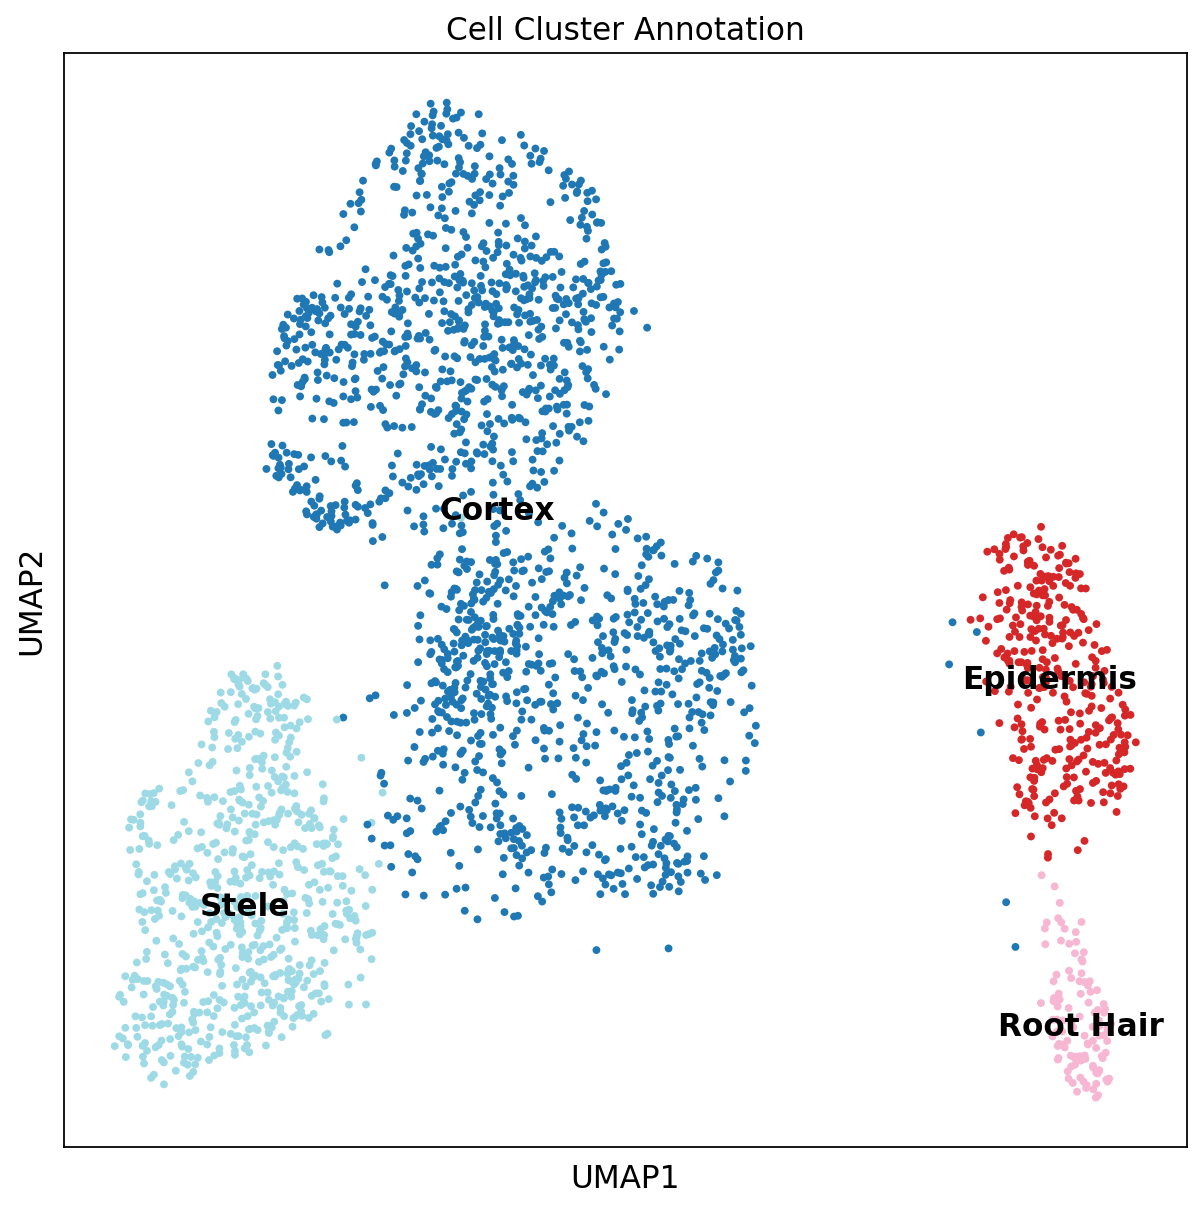

In [38]:
sc.pl.umap(sec_maize, color = ['Cell Cluster Annotation'],palette= 'tab20', s=50, legend_loc = 'on data')

In [39]:
sec_maize.obs

,n_genes,leiden,Cell Cluster Annotation
AAACCCAAGAAACACT-1,455,10,Cortex
AAACCCAAGAGCAGCT-1,992,1,Stele
AAACCCAGTGATCATC-1,636,1,Stele
AAACCCATCAGACCCG-1,736,1,Stele
AAACGAACATCGTGCG-1,911,5,Epidermis
...,...,...,...
TTTGGTTTCTGACAGT-1,589,10,Cortex
TTTGTTGAGAGCAGTC-1,727,0,Cortex
TTTGTTGAGTCGCCAC-1,426,5,Epidermis
TTTGTTGCATAAGATG-1,1481,0,Cortex


In [40]:
sec_rice.obs

,leiden,Cell Cluster Annotation
AAACCTGAGCACCGTC-1,5,Epidermis
AAACCTGAGCTTTGGT-1,0,Cortex
AAACCTGAGTAGTGCG-1,3,Cortex
AAACCTGAGTTAAGTG-1,5,Epidermis
AAACCTGCAACTTGAC-1,3,Cortex
...,...,...
TTTGTCAGTTTAGCTG-1,2,Epidermis
TTTGTCAGTTTGACAC-1,3,Cortex
TTTGTCATCATTGCCC-1,2,Epidermis
TTTGTCATCCCTTGTG-1,0,Cortex


In [43]:
### Rice To Maize
# rice_gene_of_interest = ['Os01g0118000','Os11g0171300']
# maize_genes_of_interest = ['Zm00001d008491']



# ###
# rice_gene_of_interest = ['Os01g0118000','Os11g0171300']
# maize_genes_of_interest = ['Zm00001d008491']


rice_gene_of_interest = ['Os01g0118000','Os11g0171300']
maize_genes_of_interest = ['Zm00001d023559','Zm00001d008491']


# rice_gene_of_interest = ['Os05g0168500','Os08g0496900']
# maize_genes_of_interest = ['Zm00001d051675']

# rice_gene_of_interest = ['Os07g0584100','Os11g0160300']
# maize_genes_of_interest = ['Zm00001d021948']

# rice_gene_of_interest = ['Os03g0206700']
# maize_genes_of_interest = ['Zm00001d033344','Zm00001d023313']

# rice_gene_of_interest = ['Os05g0470000']
# maize_genes_of_interest = ['Zm00001d042993','Zm00001d047637']

# rice_gene_of_interest = ['Os03g0836000','Os05g0438800']
# maize_genes_of_interest = ['Zm00001d034761']

total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])
list_of_values_for_line_plot = []
for cell_type in ['Stele','Cortex','Epidermis','Root Hair']:
    
    # Do Rice Genes
    rice_type_anndata = sec_rice[sec_rice.obs['Cell Cluster Annotation'] == cell_type,:]
    rice_type_anndata = rice_type_anndata[:,rice_type_anndata.var_names.isin(rice_gene_of_interest)]

 

    rice_panda_version_of_current_data = pd.DataFrame(columns = rice_type_anndata.var_names, index = rice_type_anndata.obs.index, data = rice_type_anndata.X.todense())
    

    ### bar plot Calculator
    # series_of_means = panda_version_of_current_data.mean()
    # list_of_values_for_line_plot.extend(list(zip(series_of_means.index,series_of_means,[cell_type]*len(series_of_means))))


    ## Don't Average and instead get all values for pointplot
    melted_genes = rice_panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    melted_genes['Gene'] = 'Rice-' + melted_genes['Gene']
    total_gene_df = pd.concat([total_gene_df,melted_genes])


    ### Do Maize Genes
    maize_type_anndata = sec_maize[sec_maize.obs['Cell Cluster Annotation'] == cell_type,:]
    maize_type_anndata = maize_type_anndata[:,maize_type_anndata.var_names.isin(maize_genes_of_interest)]

 

    maize_panda_version_of_current_data = pd.DataFrame(columns = maize_type_anndata.var_names, index = maize_type_anndata.obs.index, data = maize_type_anndata.X.todense())
    

    ### bar plot Calculator
    # series_of_means = panda_version_of_current_data.mean()
    # list_of_values_for_line_plot.extend(list(zip(series_of_means.index,series_of_means,[cell_type]*len(series_of_means))))


    ## Don't Average and instead get all values for pointplot
    melted_genes = maize_panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    melted_genes['Gene'] = 'Maize-' + melted_genes['Gene']
    total_gene_df = pd.concat([total_gene_df,melted_genes])



maize_panda_version_of_current_data

,Zm00001d008491,Zm00001d023559
AAAGGGCGTGGTCTTA-1,0.000000,0.0
AAGATAGAGGCTCAAG-1,0.000000,0.0
AAGTGAAGTGGCATCC-1,0.000000,0.0
AATCGTGGTAAGACCG-1,0.000000,0.0
ACCAAACCAAGGCTTT-1,0.000000,0.0
...,...,...
TTACTGTCATAATGAG-1,0.000000,0.0
TTCACCGTCACAAGGG-1,0.000000,0.0
TTGAACGAGTAGAATC-1,0.000000,0.0
TTGCATTAGAGCATCG-1,0.000000,0.0


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Stele'),
  Text(1, 0, 'Cortex'),
  Text(2, 0, 'Epidermis'),
  Text(3, 0, 'Root Hair')])

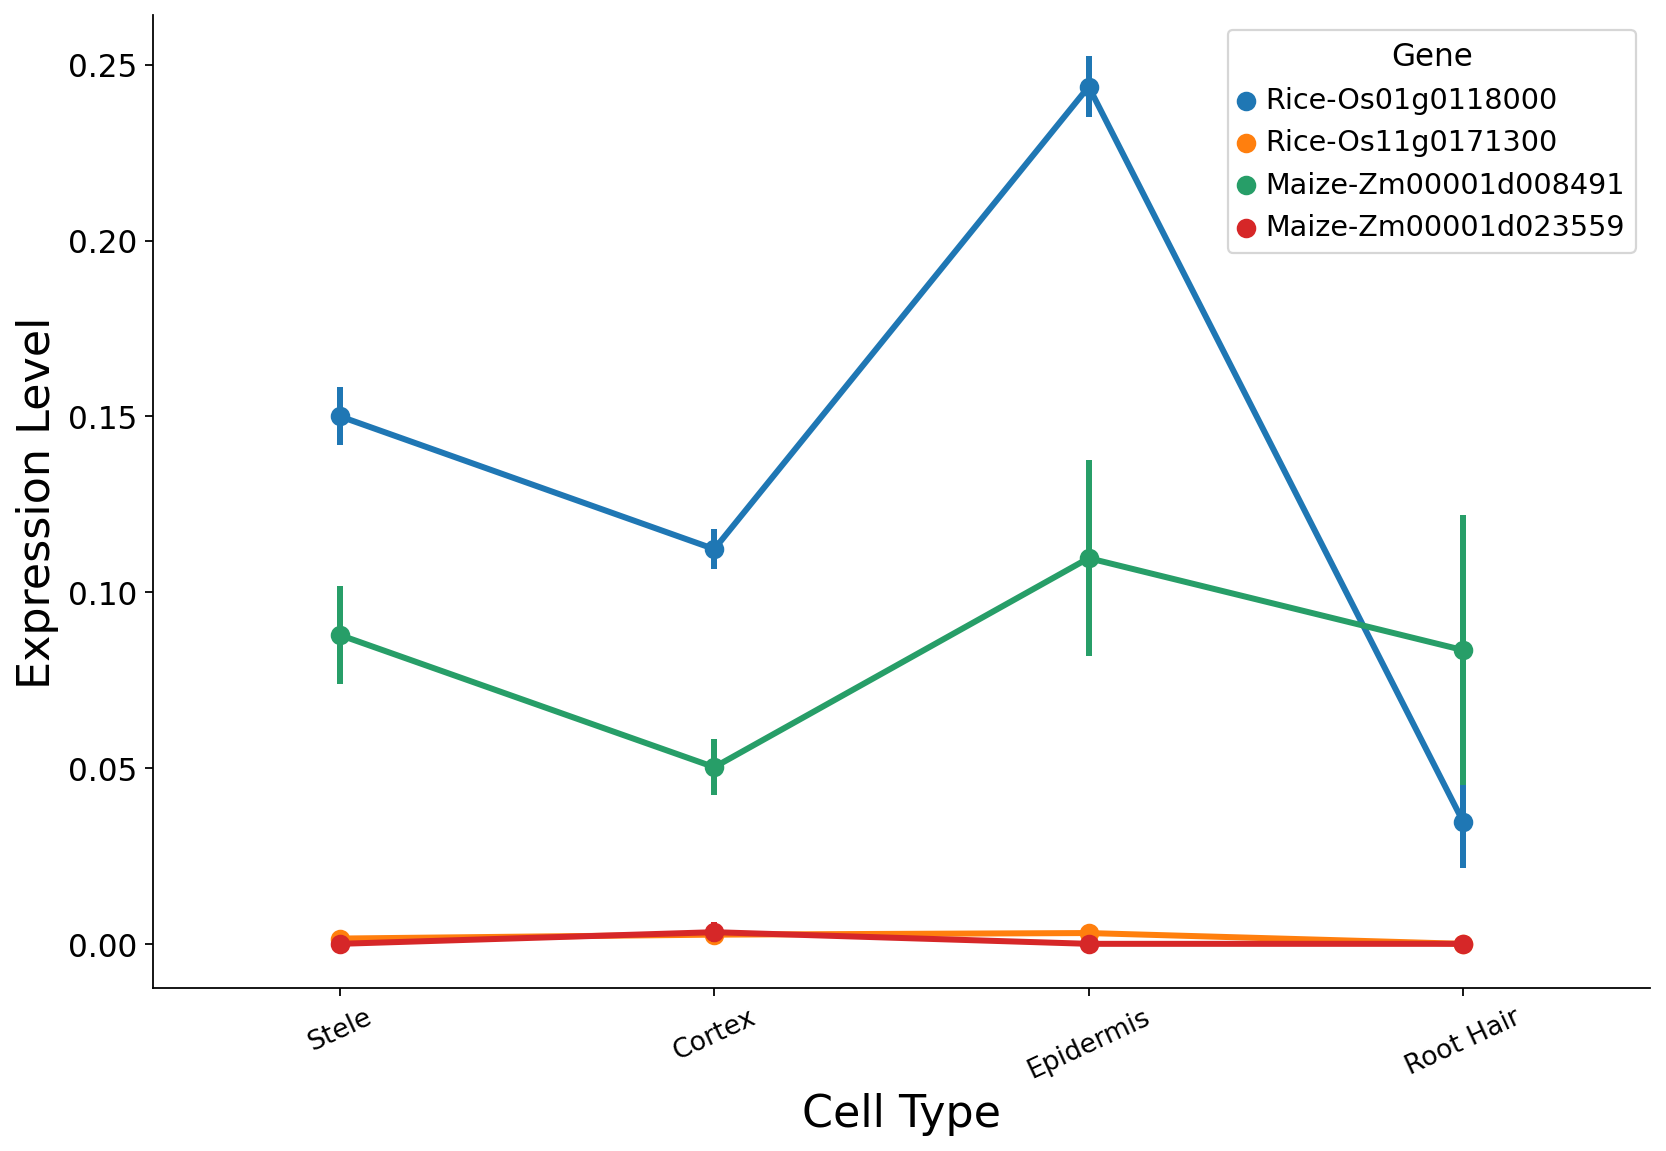

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.pointplot(data = total_gene_df, x = 'Cell Type',y = 'Expression Level',hue = 'Gene', errorbar= 'se')
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)

In [49]:
cell_type_mapper = {'Epidermis':1,'Stele':2,'Cortex':3,'Root Hair':4}

In [50]:
total_gene_df['Cell Type Number'] = total_gene_df['Cell Type'].map(cell_type_mapper)

In [48]:
total_gene_df

,Gene,Expression Level,Cell Type
0,Rice-Os01g0118000,0.000000,Stele
1,Rice-Os01g0118000,0.000000,Stele
2,Rice-Os01g0118000,0.000000,Stele
3,Rice-Os01g0118000,0.868413,Stele
4,Rice-Os01g0118000,0.000000,Stele
...,...,...,...
209,Maize-Zm00001d023559,0.000000,Root Hair
210,Maize-Zm00001d023559,0.000000,Root Hair
211,Maize-Zm00001d023559,0.000000,Root Hair
212,Maize-Zm00001d023559,0.000000,Root Hair


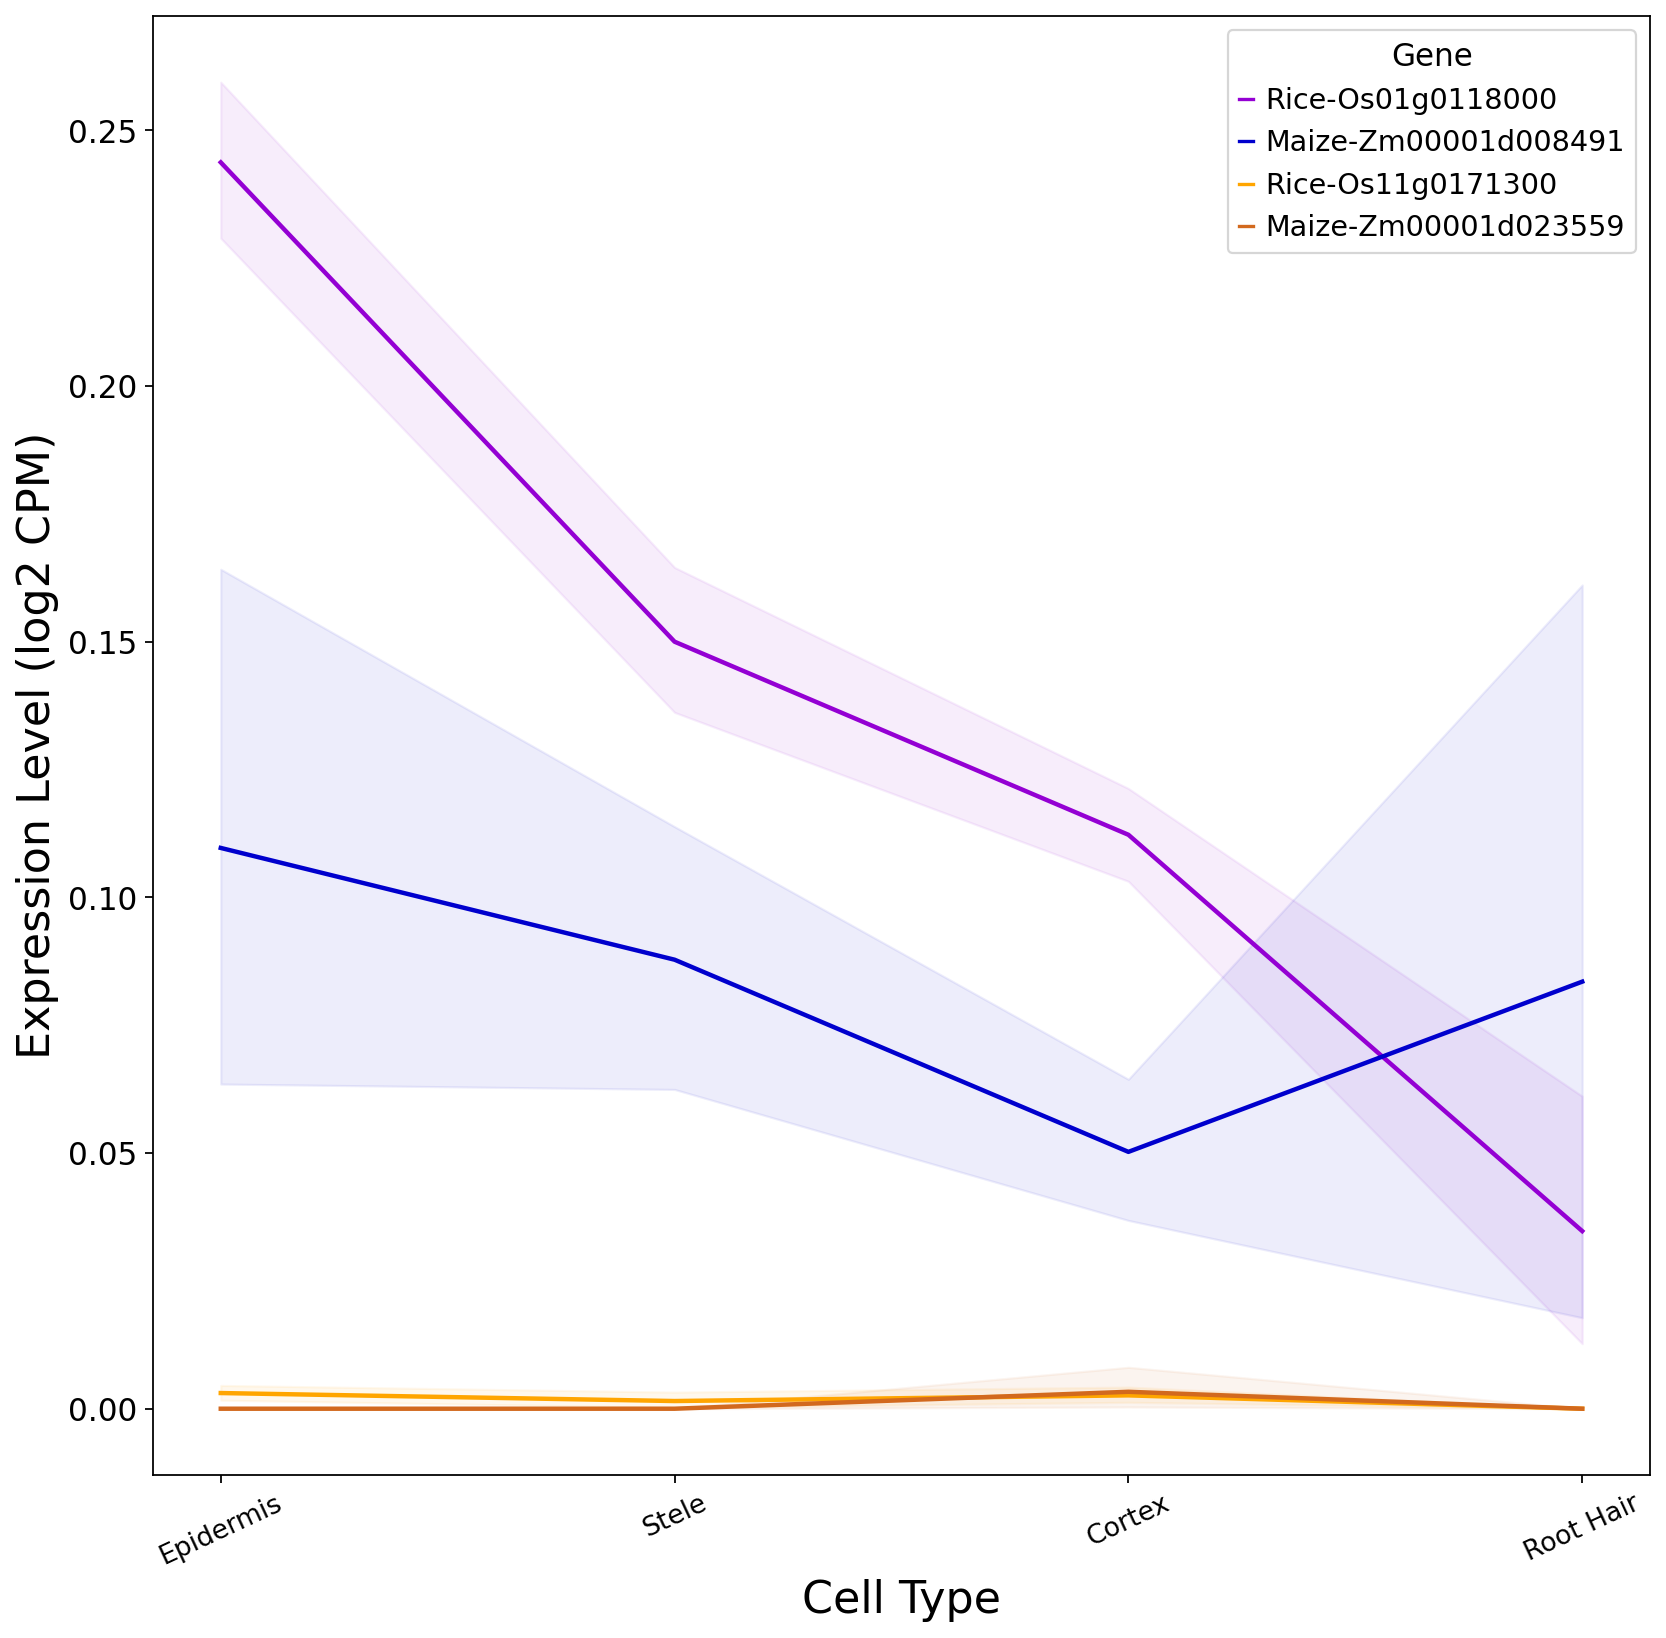

In [57]:
fig, ax = plt.subplots(figsize = (12,12))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = total_gene_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['Rice-Os01g0118000','Maize-Zm00001d008491','Rice-Os11g0171300','Maize-Zm00001d023559'], palette= ['darkviolet','mediumblue','orange','chocolate'],  err_kws= {'alpha':.07,}, linewidth = 2) #style = 'Gene', dashes = True
plt.ylabel("Expression Level (log2 CPM)", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
# sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
ax.set_xticks([1,2,3,4], labels=['Epidermis','Stele','Cortex','Root Hair'])
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/rice_maize_genes.svg')